In [1]:
pip install spotipy --upgrade

Requirement already up-to-date: spotipy in /Users/rebecca/opt/anaconda3/lib/python3.8/site-packages (2.19.0)
Note: you may need to restart the kernel to use updated packages.


In [51]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #Import decision tree classifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import io
import pydotplus
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [71]:
#Set environment credentials
os.environ['SPOTIPY_CLIENT_ID'] = '6261ab7775834d01be49dd16bae856ac'
os.environ['SPOTIPY_CLIENT_SECRET'] = '6c1874fbb15c4a879d8ec9a11fa0965c'
os.environ['SPOTIPY_REDIRECT_URI'] = 'https://google.com'

In [105]:
#Set scope to specific level of access and modification
scope = 'user-library-read playlist-read-private playlist-modify-private'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))

In [106]:
#Get list of track IDs from specific playlist
def getTrackIDs(user, playlist_id):
    track_ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        track_ids.append(track['id'])
    return track_ids

In [107]:
#Get list of track IDs from user's good playlist
good_ids = getTrackIDs('user id', '5DsNzh2G2SP22usEQtHyxN')
print(len(good_ids))
print(good_ids)

100
['7gAnjbbi06muBkgsnEYFYp', '2pn8dNVSpYnAtlKFC8Q0DJ', '2dHoVW9AxJVSRebPRyV2aA', '5KnAca7g0lgwzCNA64WE9d', '2Ghu1DdMwxS3VAyB7i38Wo', '5zH2inEP6THOY8tomr3DdZ', '4as4XEOR03oGm1STUKl6pa', '0lSJQip2wVidbu1JfZ4IEQ', '245onUPHGD1DYuiacxTuW0', '2YkjXEab4USTV9uuAgC90E', '5XJEdVQ5jl3C3dFsV7kCTZ', '5vdqSjUj9JZsAHdr02Vygk', '6SmfBvW4JgsoZPhagI0N3L', '5w4LtwuC1WuaObpLafjGZU', '2ujA6F1cpk3m8lsPE5aKua', '2Dn0UlDRJ4iSMlSdZ103pg', '6n6G0ORHLwMiQYzgT0QxWV', '6EjU5hbaHHtzuZUGkH0cJQ', '1kFevEv3s7Gf6o5xSDR5DL', '52ojopYMUzeNcudsoz7O9D', '1aLs0cj0F8N1b6Rgmuifon', '0rKtyWc8bvkriBthvHKY8d', '1ILLB5uvWk1lQJOY7q645K', '2fv00qmva1kpCctrKgoIer', '5QZHS9YzYpNDY8nmG2h64N', '05mAIVLkIWc2d1UBYZBCp8', '29eSUWTaHCK25EPDNTk1hG', '1FpAKPGuR8SoIUw5t0I5vn', '2ph6j1xoZ5lIzWGV9lNg8M', '4uBl38yXhlcQoko7Hlgqnf', '2OQMSCUE6ClEZFJFFNqNrQ', '2dQkCBUasJzLfNjSumrRDd', '0RqzUS7AkBhQDrBxcGFeDv', '570A5teOwKNMPN7bboi8T4', '72NewffMWAO9kH55vT6dXj', '0vA82YPx1q4JRWFISf1vIZ', '5jhYykolbcG1T9wZSyvhp5', '644aVns0mIqtLY9Wqzm7zD', '6Kke9M

In [108]:
#Extract Track features given track ID
def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    trackID = id
    
    name = track_info['name']
    album = track_info['album']['name']
    artist = track_info['album']['artists'][0]['name']
    release_date = track_info['album']['release_date']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    valence = features_info[0]['valence']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy,
                  instrumentalness, liveness, loudness, speechiness, valence, tempo, time_signature, trackID]
    return track_data

In [109]:
#Extract list of features from good songs
good_list = []
for i in range(len(good_ids)):
    #time.sleep(.3)
    track_data = getTrackFeatures(good_ids[i])
    good_list.append(track_data)

# Adding target = 1 for liked songs
good_list = [x + [1] for x in good_list]

In [110]:
#Good list features dataframe
column_list = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy',
           'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'time_signature', 'trackIDs', 'target']

good_df = pd.DataFrame(good_list, columns=column_list)
good_df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,trackIDs,target
0,All For Love,Kick Back - The 3rd Mini Album,WayV,2021-03-10,197746,51,0.3040,0.604,0.778,0.000000,0.1080,-3.504,0.0356,0.324,99.039,4,7gAnjbbi06muBkgsnEYFYp,1
1,On The Ground,R,ROSÉ,2021-03-12,168085,74,0.0174,0.311,0.607,0.000000,0.1310,-6.578,0.1100,0.286,188.700,4,2pn8dNVSpYnAtlKFC8Q0DJ,1
2,Gone,R,ROSÉ,2021-03-12,207163,73,0.5940,0.647,0.377,0.000000,0.0768,-6.003,0.0375,0.653,79.936,4,2dHoVW9AxJVSRebPRyV2aA,1
3,Lovemonth,Lovemonth,YUKIKA,2021-03-02,213868,39,0.1470,0.694,0.912,0.000000,0.2790,-2.369,0.0447,0.551,103.992,4,5KnAca7g0lgwzCNA64WE9d,1
4,That's okay,That's okay,D.O.,2019-07-01,221373,67,0.7230,0.679,0.442,0.000000,0.2310,-8.928,0.0637,0.628,129.671,4,2Ghu1DdMwxS3VAyB7i38Wo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Thinkin Bout You,Thinkin Bout You,Frank Ocean,2012-01-01,201106,52,0.3310,0.726,0.329,0.003490,0.1340,-11.181,0.0408,0.216,129.844,4,7ehvyx8K9ZRbOofjeUyIic,1
96,BByong,The 3rd Single Album 'IKYK',Saturday,2019-09-19,209893,0,0.0962,0.793,0.886,0.000032,0.3380,-2.283,0.0786,0.647,129.915,4,5ybQqmMLrERtSZrKxeTULw,1
97,"Save Me, Save You",WJ PLEASE?,WJSN,2018-09-19,224930,56,0.0540,0.729,0.928,0.000000,0.3600,-3.028,0.0540,0.618,115.998,4,20yOiJHRQGirFYehRSIb6i,1
98,Black Mamba,Black Mamba,aespa,2020-11-17,174933,78,0.0618,0.520,0.915,0.000946,0.0856,-2.862,0.1030,0.500,90.069,4,1t2qYCAjUAoGfeFeoBlK51,1


In [111]:
#Get bad song IDs from user playlist
bad_ids = getTrackIDs('user id', '6j89lDpVDNznEqFDe3xAlq')
print(len(bad_ids))
print(bad_ids)

100
['42qa1IoXDeSt0zzWTOuwyG', '4DQEhtFcX9nK0zWNjb1xBw', '17ExHVQYfJBlTSnbidz0LQ', '7yhN7C46ts8tAKHoNRrBL6', '6grZ25M9c5o8T75z0tY0xq', '3jpGc7gcoTyQsrlfQ332Ql', '06LJEYjJYDofVju6dwfp7t', '7nGc6tq27wHwpF7iFdUaWr', '3BPdKJxzfJX63N7LYLDpI6', '4ETbokNqYyStQTv73oBcky', '47qV9FAvLMUi5Ui6aTtyNT', '1JQaVRvmmInKm7WG0H6FDK', '4g0mCLGfAuDATAfmTggACN', '1pShlPEW4nhGQeomZLCXtL', '0OzYhueF403FBct7orzGEg', '5p144lbzJw9kMCMOG61SF3', '46HFTyFqLMzSye98Arqa98', '6Op6N8JQWZTV47SmYkGVsM', '0XHnYbXteyBDfVvk9EGaPu', '579m9YJsOMXEukNFvESTQ8', '4tKL65lg6TSVBoMCRePoC6', '1kKzLv3w7I5NXzEtWkSzi4', '2sOzXOVI7Ia5ima0kLSl7v', '070TMc1fjJGBGxxmf1DIbD', '7KQ3levJCYgbVmXWNwzlad', '05eJpA9YX6C25tnJEOgEpH', '4ZQzRlJDaPAHT8KCrSp1Dg', '52OSF0Q6raA5sTdU5d0eJh', '32OjCvkJLW1ADWiy8wSltr', '6ZR9UKnZGa5IMrcF35dbmW', '0P9Qos8So9CvtFPjgQq3Ns', '5CGfdX7fVUbDVHZSIk7loe', '6K2VQLJfexhkn3teQeAwkd', '1IkIz1S8dySoBA5pWgAtbh', '5sUQJq1Dzwm0bLaJElLeFD', '0O7fXel2uzgJraKd1NBSVb', '6VrgzSdbqpA9cAvUbd1Rwx', '2ELJVh73KvsD7ZKoacZGjF', '3eJaCU

In [112]:
#Extract features of bad songs
bad_list = []
for i in range(len(bad_ids)):
    #time.sleep(.3)
    track_data2 = getTrackFeatures(bad_ids[i])
    bad_list.append(track_data2)
    
# Adding target = 0 for disliked songs
bad_list = [x + [0] for x in bad_list]

In [113]:
#Bad songs features dataframe
bad_df = pd.DataFrame(bad_list, columns=column_list)
bad_df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,trackIDs,target
0,Start The Healing,Start The Healing,Korn,2021-11-11,208053,63,0.002010,0.4680,0.9500,0.326000,0.2820,-3.366,0.2640,0.4120,149.968,4,42qa1IoXDeSt0zzWTOuwyG,0
1,The Chapeltown Rag,The Chapeltown Rag,Slipknot,2021-11-05,291660,67,0.001880,0.5160,0.9970,0.000870,0.1700,-2.430,0.2490,0.0762,95.038,4,4DQEhtFcX9nK0zWNjb1xBw,0
2,I Am Damnation,I Am Damnation,Bleed From Within,2021-11-12,286000,61,0.000662,0.4760,0.9660,0.000212,0.0538,-4.228,0.0727,0.2270,92.506,4,17ExHVQYfJBlTSnbidz0LQ,0
3,Daggers,Daggers,We Came As Romans,2021-11-10,194093,64,0.000062,0.4350,0.9610,0.000134,0.3840,-3.658,0.1410,0.4270,148.016,4,7yhN7C46ts8tAKHoNRrBL6,0
4,Becoming,Becoming,Volbeat,2021-10-28,253325,12,0.000002,0.4450,0.9420,0.043900,0.3130,-6.558,0.0592,0.3840,120.037,4,6grZ25M9c5o8T75z0tY0xq,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Violin Concerto in D Major, Op. 35, TH. 59: II...",Tchaikovsky / Korngold: Violin Concertos,Anne-Sophie Mutter,2004-01-01,424653,44,0.938000,0.4050,0.3180,0.723000,0.2840,-17.140,0.0565,0.3420,151.434,4,7hOLwSaTSkrqxSMzj4bXI1,0
96,"Tahiti Trot, Op. 16 (After V. Youmans's ""Tea f...",Shostakovich: Orchestral Works,Dmitri Shostakovich,2002-04-15,249640,22,0.950000,0.2910,0.0981,0.865000,0.2750,-23.156,0.0398,0.1940,138.168,4,1uARLLfeQPlBf1jSN4P0yK,0
97,The Promise,The Piano: Music From The Motion Picture,Michael Nyman,1993-01-01,256493,57,0.937000,0.0992,0.2260,0.903000,0.1830,-14.840,0.0339,0.0605,79.518,4,53ann6bENp7BF8uklrzQAp,0
98,Let Me Love You,Encore,DJ Snake,2016-08-05,205946,85,0.086300,0.6490,0.7160,0.000026,0.1350,-5.371,0.0349,0.1630,99.988,4,0lYBSQXN6rCTvUZvg9S0lU,0


In [114]:
#Combined dataframe with good and bad song features
combined = pd.concat([good_df, bad_df])
combined

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,trackIDs,target
0,All For Love,Kick Back - The 3rd Mini Album,WayV,2021-03-10,197746,51,0.3040,0.6040,0.7780,0.000000,0.1080,-3.504,0.0356,0.3240,99.039,4,7gAnjbbi06muBkgsnEYFYp,1
1,On The Ground,R,ROSÉ,2021-03-12,168085,74,0.0174,0.3110,0.6070,0.000000,0.1310,-6.578,0.1100,0.2860,188.700,4,2pn8dNVSpYnAtlKFC8Q0DJ,1
2,Gone,R,ROSÉ,2021-03-12,207163,73,0.5940,0.6470,0.3770,0.000000,0.0768,-6.003,0.0375,0.6530,79.936,4,2dHoVW9AxJVSRebPRyV2aA,1
3,Lovemonth,Lovemonth,YUKIKA,2021-03-02,213868,39,0.1470,0.6940,0.9120,0.000000,0.2790,-2.369,0.0447,0.5510,103.992,4,5KnAca7g0lgwzCNA64WE9d,1
4,That's okay,That's okay,D.O.,2019-07-01,221373,67,0.7230,0.6790,0.4420,0.000000,0.2310,-8.928,0.0637,0.6280,129.671,4,2Ghu1DdMwxS3VAyB7i38Wo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Violin Concerto in D Major, Op. 35, TH. 59: II...",Tchaikovsky / Korngold: Violin Concertos,Anne-Sophie Mutter,2004-01-01,424653,44,0.9380,0.4050,0.3180,0.723000,0.2840,-17.140,0.0565,0.3420,151.434,4,7hOLwSaTSkrqxSMzj4bXI1,0
96,"Tahiti Trot, Op. 16 (After V. Youmans's ""Tea f...",Shostakovich: Orchestral Works,Dmitri Shostakovich,2002-04-15,249640,22,0.9500,0.2910,0.0981,0.865000,0.2750,-23.156,0.0398,0.1940,138.168,4,1uARLLfeQPlBf1jSN4P0yK,0
97,The Promise,The Piano: Music From The Motion Picture,Michael Nyman,1993-01-01,256493,57,0.9370,0.0992,0.2260,0.903000,0.1830,-14.840,0.0339,0.0605,79.518,4,53ann6bENp7BF8uklrzQAp,0
98,Let Me Love You,Encore,DJ Snake,2016-08-05,205946,85,0.0863,0.6490,0.7160,0.000026,0.1350,-5.371,0.0349,0.1630,99.988,4,0lYBSQXN6rCTvUZvg9S0lU,0


In [82]:
# Features to compare: energy, instrumentalness, speechiness, tempo, valence
# From songData divide data into features that we want to compare and also split by liked and disliked songs
likeDanceability =combined[combined['target'] == 1]['danceability']
dislikeDanceability = combined[combined['target'] == 0]['danceability']

likeEnergy = combined[combined['target'] == 1]['energy']
dislikeEnergy = combined[combined['target'] == 0]['energy']

likeLoudness = combined[combined['target'] == 1]['loudness']
dislikeLoudness = combined[combined['target'] == 0]['loudness']

likeSpeechiness = combined[combined['target'] == 1]['speechiness']
dislikeSpeechiness = combined[combined['target'] == 0]['speechiness']

likeInstrumentalness = combined[combined['target'] == 1]['instrumentalness']
dislikeInstrumentalness = combined[combined['target'] == 0]['instrumentalness']

likeTempo = combined[combined['target'] == 1]['tempo']
dislikeTempo = combined[combined['target'] == 0]['tempo']

likeValence = combined[combined['target'] == 1]['valence']
dislikeValence = combined[combined['target'] == 0]['valence']

likeAcoustic = combined[combined['target'] == 1]['acousticness']
dislikeAcoustic = combined[combined['target'] == 0]['acousticness']

likeLiveness = combined[combined['target'] == 1]['liveness']
dislikeLiveness = combined[combined['target'] == 0]['liveness']

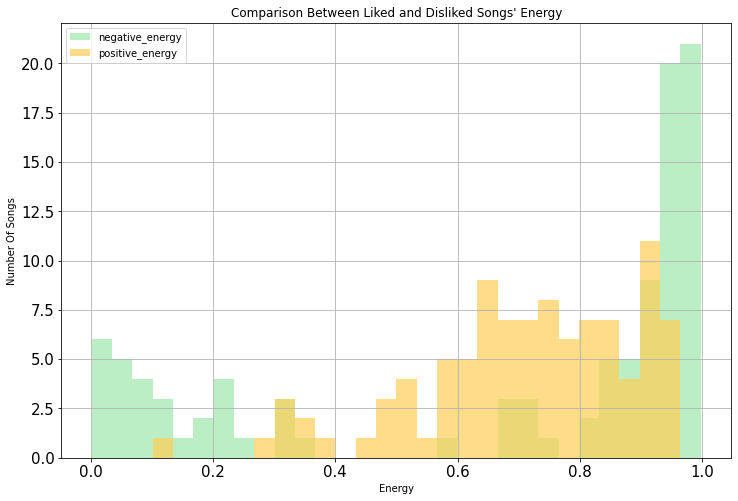

In [83]:
# Create df that only holds all the important columns we need
new_df = combined[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'target']]
'''
Testing out which graph could ideally represent a detailed plot of our data.
We'll test it with one feature field (energy) and get a general idea 
'''
pos_energy_arr = []

pos_df = new_df[new_df.target == 1]
pos_energy = pos_df.energy

for i in pos_energy:
    pos_energy_arr.append(i)
    
neg_energy_arr = []

neg_df = new_df[new_df.target == 0]
neg_energy = neg_df.energy

for i in neg_energy:
    neg_energy_arr.append(i)

energy_df = pd.DataFrame({"negative_energy": neg_energy_arr, "positive_energy": pos_energy_arr})

energy_df.plot(kind='hist',
        alpha=0.7,
        bins=30,
        title="Comparison Between Liked and Disliked Songs' Energy",
        grid=True,
        figsize=(12,8),
        fontsize=15, 
        color=['#A0E8AF', '#FFCF56'])

plt.xlabel('Energy')
plt.ylabel("Number Of Songs");

<ipython-input-84-0210d1aca26b>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig2.add_subplot(331)
<ipython-input-84-0210d1aca26b>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig2.add_subplot(332)
<ipython-input-84-0210d1aca26b>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always 

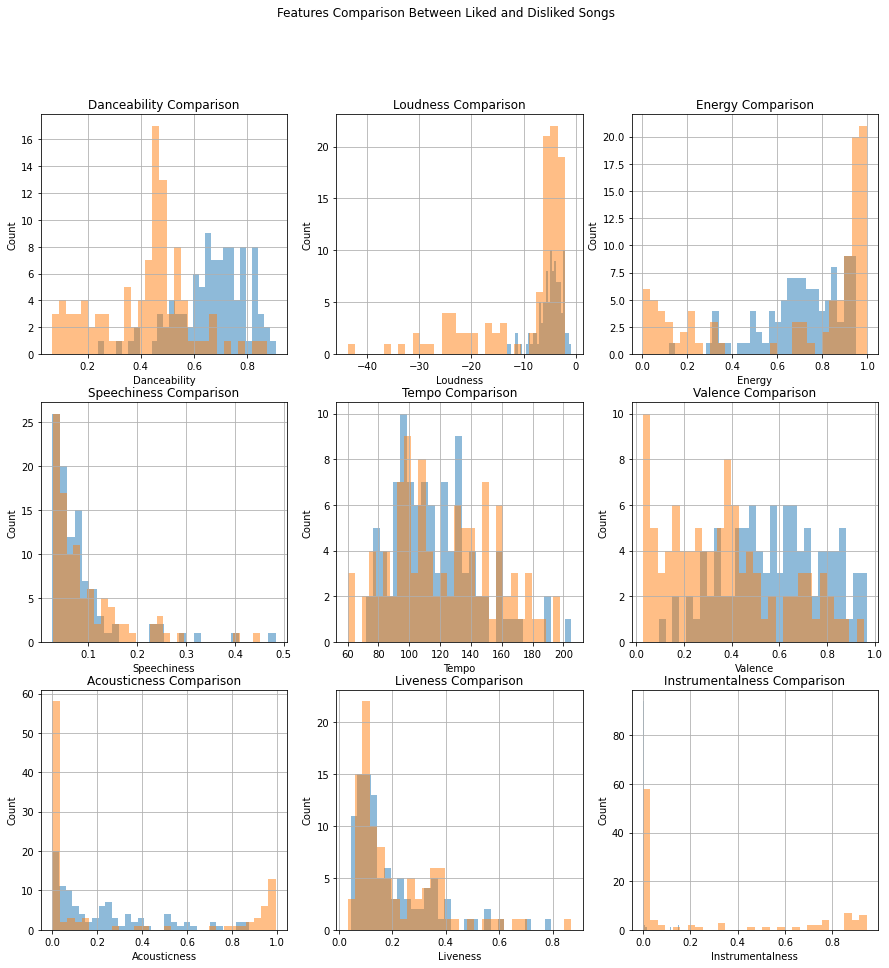

In [84]:
fig2 = plt.figure(figsize=(15,15))

#Danceability
ax1 = fig2.add_subplot(331)
ax1.set_xlabel('Danceability')
ax1.set_ylabel('Count')
ax1.set_title('Danceability Comparison')
likeDanceability.hist(alpha= 0.5, bins=30)
ax2 = fig2.add_subplot(331)
dislikeDanceability.hist(alpha= 0.5, bins=30)

#Loudness
ax3 = fig2.add_subplot(332)
ax3.set_xlabel('Loudness')
ax3.set_ylabel('Count')
ax3.set_title('Loudness Comparison')
likeLoudness.hist(alpha= 0.5, bins=30)
ax4 = fig2.add_subplot(332)
dislikeLoudness.hist(alpha= 0.5, bins=30)

#Energy
ax5 = fig2.add_subplot(333)
ax5.set_xlabel('Energy')
ax5.set_ylabel('Count')
ax5.set_title('Energy Comparison')
likeEnergy.hist(alpha= 0.5, bins=30)
ax6 = fig2.add_subplot(333)
dislikeEnergy.hist(alpha= 0.5, bins=30)

#Speechiness
ax7 = fig2.add_subplot(334)
ax7.set_xlabel('Speechiness')
ax7.set_ylabel('Count')
ax7.set_title('Speechiness Comparison')
likeSpeechiness.hist(alpha= 0.5, bins=30)
ax8 = fig2.add_subplot(334)
dislikeSpeechiness.hist(alpha= 0.5, bins=30)

#Tempo
ax7 = fig2.add_subplot(335)
ax7.set_xlabel('Tempo')
ax7.set_ylabel('Count')
ax7.set_title('Tempo Comparison')
likeTempo.hist(alpha= 0.5, bins=30)
ax8 = fig2.add_subplot(335)
dislikeTempo.hist(alpha= 0.5, bins=30)

#Valence
ax9 = fig2.add_subplot(336)
ax9.set_xlabel('Valence')
ax9.set_ylabel('Count')
ax9.set_title('Valence Comparison')
likeValence.hist(alpha= 0.5, bins=30)
ax10 = fig2.add_subplot(336)
dislikeValence.hist(alpha= 0.5, bins=30)

#Acousticness
ax11 = fig2.add_subplot(337)
ax11.set_xlabel('Acousticness')
ax11.set_ylabel('Count')
ax11.set_title('Acousticness Comparison')
likeAcoustic.hist(alpha= 0.5, bins=30)
ax12 = fig2.add_subplot(337)
dislikeAcoustic.hist(alpha= 0.5, bins=30)

#Liveness
ax13 = fig2.add_subplot(338)
ax13.set_xlabel('Liveness')
ax13.set_ylabel('Count')
ax13.set_title('Liveness Comparison')
likeLiveness.hist(alpha= 0.5, bins=30)
ax14 = fig2.add_subplot(338)
dislikeLiveness.hist(alpha= 0.5, bins=30)

#Instrumentalness
ax15 = fig2.add_subplot(339)
ax15.set_xlabel('Instrumentalness')
ax15.set_ylabel('Count')
ax15.set_title('Instrumentalness Comparison')
likeInstrumentalness.hist(alpha= 0.5, bins=30)
ax6 = fig2.add_subplot(339)
dislikeInstrumentalness.hist(alpha= 0.5, bins=30)

fig2.suptitle(
    "Features Comparison Between Liked and Disliked Songs"
);

In [85]:
trainData = combined

#Defining the features that we want to look at
features = ["danceability", "loudness", "energy", "speechiness", "instrumentalness", "tempo", "valence", "acousticness", "liveness"]

#Split dataset in features and target variable
X = trainData[features] # Features
y = trainData.target # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [86]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
score = accuracy_score(y_test, knn_pred) * 100
print("Accuracy using Knn Tree: ", round(score, 1), "%")

Accuracy using Knn Tree:  47.5 %


In [87]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
score = accuracy_score(y_test, ada_pred) * 100
print("Accuracy using Ada: ", round(score, 1), "%")

Accuracy using Ada:  82.5 %


In [93]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#print overall model accuracy when given training data
print('Accuracy of decision tree model on training set: {:.2f}'.format(clf.score(X_train, y_train)))
#print overall model accuracy when given test data
print('Accuracy of decision tree model on test set: {:.2f}'.format(clf.score(X_test, y_test)))

#accuracy can be computed by comparing actual test set values and predicted values
print("Accuracy using Decision Tree:", accuracy_score(y_test, y_pred) * 100)

Accuracy of decision tree model on training set: 1.00
Accuracy of decision tree model on test set: 0.82
Accuracy using Decision Tree: 82.5


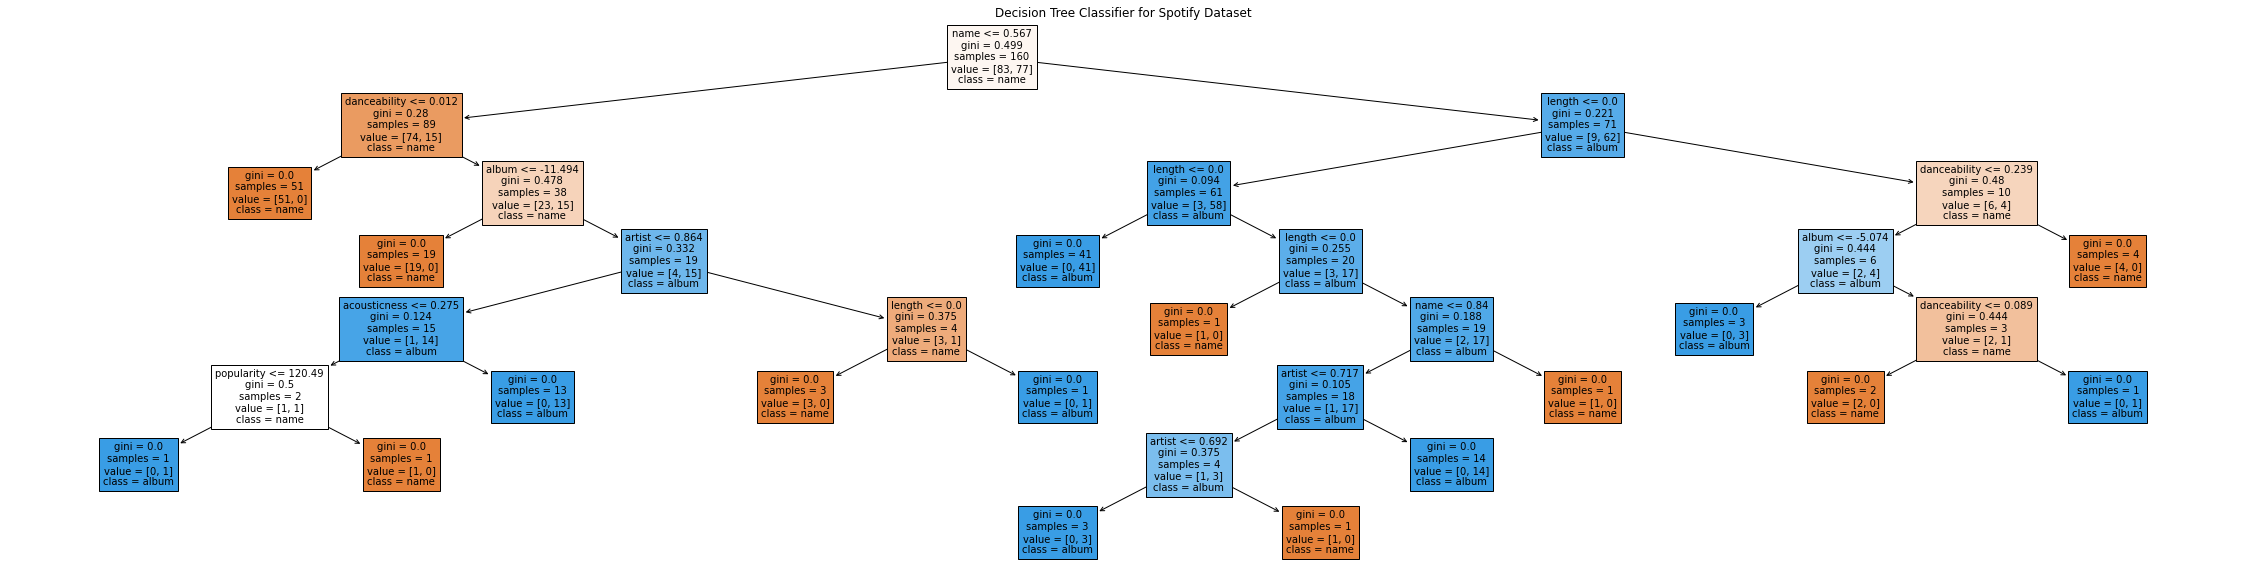

In [94]:
#Plotting the Decision Tree
plt.figure(figsize = (40, 10))
tree.plot_tree(clf, feature_names=trainData.columns, class_names=trainData.columns, filled=True, fontsize=10)
plt.title("Decision Tree Classifier for Spotify Dataset")
plt.show()

In [95]:
# Create Random Forest classifer object
rdf = RandomForestClassifier(random_state=0)

# Train Random Forest Classifer
rdf = rdf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = rdf.predict(X_test)

#print overall model accuracy when given training data
print('Accuracy of random forest model on training set: {:.2f}'.format(rdf.score(X_train, y_train)))
#print overall model accuracy when given test data
print('Accuracy of random forest model on test set: {:.2f}'.format(rdf.score(X_test, y_test)))

#accuracy can be computed by comparing actual test set values and predicted values
print("Accuracy using Random Forest:", accuracy_score(y_test, y_pred) * 100)

Accuracy of random forest model on training set: 1.00
Accuracy of random forest model on test set: 0.82
Accuracy using Random Forest: 82.5


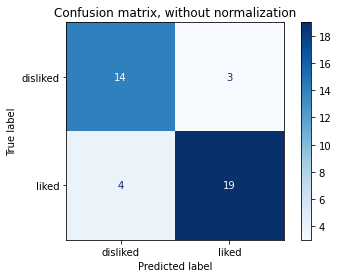

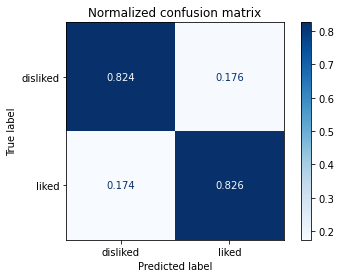

In [96]:
# create normalized and non-normalized confusion matrices to display model's prediction accuracy

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rdf, X_test, y_test,
                                 display_labels=['disliked', 'liked'],
                                 cmap=plt.cm.Blues, values_format='.3g',
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

In [97]:
# Selecting songs from Spotify's Top 50 - USA songs

sampleIDs = getTrackIDs("Spotify","37i9dQZEVXbLRQDuF5jeBp")
    
# Array of song features
sampleFeatures = []
for i in range(len(sampleIDs)):
    sample_data = getTrackFeatures(sampleIDs[i])
    sampleFeatures.append(sample_data)

In [98]:
list2 = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy',
           'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'time_signature','trackID']
sample_df = pd.DataFrame(sampleFeatures, columns=list2)
sample_df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,trackID
0,Heat Waves,Dreamland (+ Bonus Levels),Glass Animals,2020-08-06,238805,95,0.440000,0.761,0.525,0.000007,0.0921,-6.900,0.0944,0.5310,80.870,4,02MWAaffLxlfxAUY7c5dvx
1,We Don't Talk About Bruno,Encanto (Original Motion Picture Soundtrack),Lin-Manuel Miranda,2021-11-19,216120,96,0.357000,0.577,0.450,0.000000,0.1110,-8.516,0.0834,0.8300,205.863,4,52xJxFP6TqMuO4Yt0eOkMz
2,Super Gremlin,Back For Everything,Kodak Black,2022-02-25,200547,58,0.002650,0.825,0.414,0.000000,0.3570,-6.634,0.1440,0.1060,72.993,4,1Y5Jvi3eLi4Chwqch9GMem
3,pushin P (feat. Young Thug),DS4EVER,Gunna,2022-01-07,136266,93,0.007830,0.773,0.422,0.006930,0.1290,-4.572,0.1870,0.4880,77.502,1,3XOalgusokruzA5ZBA2Qcb
4,STAY (with Justin Bieber),F*CK LOVE 3: OVER YOU,The Kid LAROI,2021-07-23,141805,93,0.038300,0.591,0.764,0.000000,0.1030,-5.484,0.0483,0.4780,169.928,4,5PjdY0CKGZdEuoNab3yDmX
5,Nail Tech,Nail Tech,Jack Harlow,2022-02-18,206385,86,0.002900,0.647,0.581,0.000008,0.1190,-7.678,0.0884,0.1130,150.149,4,62Yo3FDddWY8ydu6PW2wyz
6,INDUSTRY BABY (feat. Jack Harlow),MONTERO,Lil Nas X,2021-09-17,212352,90,0.022100,0.741,0.691,0.000000,0.0476,-7.395,0.0672,0.8920,150.087,4,5Z9KJZvQzH6PFmb8SNkxuk
7,Enemy (with JID) - from the series Arcane Leag...,Mercury - Act 1,Imagine Dragons,2021-09-03,173381,85,0.237000,0.728,0.783,0.000000,0.4340,-4.424,0.2660,0.5550,77.011,4,1HhNoOuqm1a5MXYEgAFl8o
8,"I'm Tired - From ""Euphoria"" An Original HBO Se...","I'm Tired (From ""Euphoria"" An Original HBO Ser...",Labrinth,2022-02-28,187943,0,0.651000,0.375,0.133,0.000000,0.0695,-10.624,0.0352,0.1920,131.721,4,6LtHYDgYHRCHoKK3snfr2w
9,I Love You So,I Love You So,The Walters,2014-11-28,160239,95,0.583000,0.575,0.648,0.000000,0.1150,-4.891,0.0358,0.4660,75.977,4,4SqWKzw0CbA05TGszDgMlc


In [115]:
# Selected model with highest accuracy 
# predict() will allow us to predict the labels of the data on the basis of the trained model
pred = rdf.predict(sample_df[features])
print(pred) # Returns 0 and 1 based on learned data from the model 

[1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 0 1 1 1 1 1 1 0 1 0]


In [100]:
likedSongs = 0
predictions = []
i = 0
for prediction in pred:
    # 1 represents songs the model thinks we would like
    if(prediction == 1):
        print (i, sample_df["name"][i] + " - "+ sample_df["artist"][i])
        predictions.append(sample_df['trackID'][i])
        likedSongs= likedSongs + 1
        i = i +1

0 Heat Waves - Glass Animals
1 We Don't Talk About Bruno - Lin-Manuel Miranda
2 Super Gremlin - Kodak Black
3 pushin P (feat. Young Thug) - Gunna
4 STAY (with Justin Bieber) - The Kid LAROI
5 Nail Tech - Jack Harlow
6 INDUSTRY BABY (feat. Jack Harlow) - Lil Nas X
7 Enemy (with JID) - from the series Arcane League of Legends - Imagine Dragons
8 I'm Tired - From "Euphoria" An Original HBO Series - Labrinth
9 I Love You So - The Walters
10 Surface Pressure - From "Encanto"/Soundtrack Version - Lin-Manuel Miranda
11 Dark Red - Steve Lacy
12 abcdefu - GAYLE
13 Knife Talk (with 21 Savage ft. Project Pat) - Drake
14 Boyfriend - Dove Cameron
15 Need to Know - Doja Cat
16 Ghost - Justin Bieber
17 THATS WHAT I WANT - Lil Nas X
18 Lost - Frank Ocean
19 Cold Heart - PNAU Remix - Elton John
20 good 4 u - Olivia Rodrigo
21 Woman - Doja Cat
22 MAMIII - Becky G
23 No Role Modelz - J. Cole
24 505 - Arctic Monkeys
25 Sweater Weather - The Neighbourhood
26 Numb Little Bug - Em Beihold
27 family ties (wit

In [101]:
#Create playlist to place predicted songs
sp.user_playlist_create('user id', 'Model Suggested Songs', public=False)

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/5BmKs0mvQgyy5D8roJvrzl'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/5BmKs0mvQgyy5D8roJvrzl',
 'id': '5BmKs0mvQgyy5D8roJvrzl',
 'images': [],
 'name': 'Model Suggested Songs 2',
 'owner': {'display_name': 'hyejuul',
  'external_urls': {'spotify': 'https://open.spotify.com/user/rnasty727'},
  'href': 'https://api.spotify.com/v1/users/rnasty727',
  'id': 'rnasty727',
  'type': 'user',
  'uri': 'spotify:user:rnasty727'},
 'primary_color': None,
 'public': False,
 'snapshot_id': 'MSxjYmI5ZmQ4MjAyZDRhNTUxYmI4ZDM5OWMyNjNkOGU1MjQ2MGY4OGI2',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/5BmKs0mvQgyy5D8roJvrzl/tracks',
  'items': [],
  'limit': 100,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0},
 'type': 'playlist',
 'uri': 'spotify:playlist:5BmKs0mvQgyy5D8roJvrzl'}

In [102]:
#Add playlist desciption for user
desc = "List of potentially liked songs based on model's predictions from Spotify Top Hits"
sp.playlist_change_details('5BmKs0mvQgyy5D8roJvrzl',name=None, public=None, collaborative=None, description=desc)

In [103]:
print(len(predictions))

40


In [104]:
#Add songs to playlist for user to listen
sp.playlist_add_items('5BmKs0mvQgyy5D8roJvrzl', predictions, position=None)

{'snapshot_id': 'MyxhMzg5ZmMwZDUwYTIxODQ1ZGM3YWNiN2Q2MjJiMzhhNzNiZTU0OGU3'}